# Loading CSV data in python

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

# Load the datasets
housing_data = pd.read_csv('QGBN368BIS (1).csv')
interest_rate_data = pd.read_csv('IUQABEDR Bank of England Database.csv')

# Display the first few rows and the info of both datasets to understand their structure and content
print("Housing Data Preview:")
print(housing_data.head())
print(housing_data.info())

print("\nInterest Rate Data Preview:")
print(interest_rate_data.head())
print(interest_rate_data.info())

Housing Data Preview:
         DATE  QGBN368BIS
0  1998-01-01      9.1667
1  1998-04-01     12.7451
2  1998-07-01     11.9751
3  1998-10-01     12.0501
4  1999-01-01     10.0763
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        104 non-null    object 
 1   QGBN368BIS  104 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.8+ KB
None

Interest Rate Data Preview:
        Date  \
0  31 Mar 98   
1  30 Jun 98   
2  30 Sep 98   
3  31 Dec 98   
4  31 Mar 99   

   Quarterly average of official Bank Rate              [a] [b]             IUQABEDR  
0                                             7.2500                                  
1                                             7.3279                                  
2                                             7.5000                                  
3                      

In [4]:
import pandas as pd

In [5]:
# Convert DATE columns to datetime
housing_data['DATE'] = pd.to_datetime(housing_data['DATE'])
interest_rate_data['Date'] = pd.to_datetime(interest_rate_data['Date'], format='%d %b %y')

In [6]:
# Rename columns for easier access
housing_data.rename(columns={'QGBN368BIS': 'Housing_Price_Index'}, inplace=True)
interest_rate_data.rename(columns={'Quarterly average of official Bank Rate              [a] [b]             IUQABEDR': 'Bank_Rate'}, inplace=True)


# Combining Data

In [7]:
# Merge datasets on their DATE columns
combined_data = pd.merge(housing_data, interest_rate_data, left_on='DATE', right_on='Date', how='inner')
combined_data.drop('Date', axis=1, inplace=True)  # Drop redundant column

In [8]:
# Display the first few rows of the combined dataset
print(combined_data.head())

Empty DataFrame
Columns: [DATE, Housing_Price_Index, Bank_Rate]
Index: []


In [9]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


In [10]:
# Preparing data for regression
X = combined_data[['Bank_Rate']]  # Independent variable
y = combined_data['Housing_Price_Index']  # Dependent variable


In [11]:
# Check for common date ranges and the resulting number of rows in the merged dataset
print("Unique dates in housing data:", housing_data['DATE'].nunique())
print("Unique dates in interest rate data:", interest_rate_data['Date'].nunique())

# Check the head of the merged data to ensure it's not empty
print("Number of rows in merged data:", combined_data.shape[0])
print("Preview of merged data:")
print(combined_data.head())

Unique dates in housing data: 104
Unique dates in interest rate data: 104
Number of rows in merged data: 0
Preview of merged data:
Empty DataFrame
Columns: [DATE, Housing_Price_Index, Bank_Rate]
Index: []


In [12]:
# Re-examine the format conversions and merging
housing_data['DATE'] = pd.to_datetime(housing_data['DATE'])
interest_rate_data['Date'] = pd.to_datetime(interest_rate_data['Date'], format='%d %b %y')

# Print unique values to verify
print("Housing Data Dates:")
print(housing_data['DATE'].unique())

print("Interest Rate Data Dates:")
print(interest_rate_data['Date'].unique())

Housing Data Dates:
<DatetimeArray>
['1998-01-01 00:00:00', '1998-04-01 00:00:00', '1998-07-01 00:00:00',
 '1998-10-01 00:00:00', '1999-01-01 00:00:00', '1999-04-01 00:00:00',
 '1999-07-01 00:00:00', '1999-10-01 00:00:00', '2000-01-01 00:00:00',
 '2000-04-01 00:00:00',
 ...
 '2021-07-01 00:00:00', '2021-10-01 00:00:00', '2022-01-01 00:00:00',
 '2022-04-01 00:00:00', '2022-07-01 00:00:00', '2022-10-01 00:00:00',
 '2023-01-01 00:00:00', '2023-04-01 00:00:00', '2023-07-01 00:00:00',
 '2023-10-01 00:00:00']
Length: 104, dtype: datetime64[ns]
Interest Rate Data Dates:
<DatetimeArray>
['1998-03-31 00:00:00', '1998-06-30 00:00:00', '1998-09-30 00:00:00',
 '1998-12-31 00:00:00', '1999-03-31 00:00:00', '1999-06-30 00:00:00',
 '1999-09-30 00:00:00', '1999-12-31 00:00:00', '2000-03-31 00:00:00',
 '2000-06-30 00:00:00',
 ...
 '2021-09-30 00:00:00', '2021-12-31 00:00:00', '2022-03-31 00:00:00',
 '2022-06-30 00:00:00', '2022-09-30 00:00:00', '2022-12-31 00:00:00',
 '2023-03-31 00:00:00', '2023-06-30

In [13]:
# Adjust interest rate data dates to match housing data dates
interest_rate_data['Date'] = interest_rate_data['Date'] + pd.DateOffset(days=1)

# Verify that the adjustment was successful
print("Adjusted Interest Rate Data Dates:")
print(interest_rate_data['Date'].unique())

# Merge datasets again
combined_data = pd.merge(housing_data, interest_rate_data, left_on='DATE', right_on='Date', how='inner')
combined_data.drop('Date', axis=1, inplace=True)  # Clean up redundant column

# Check the merge was successful
print("Number of rows in combined data after alignment:", combined_data.shape[0])
print("Preview of combined data after alignment:")
print(combined_data.head())

Adjusted Interest Rate Data Dates:
<DatetimeArray>
['1998-04-01 00:00:00', '1998-07-01 00:00:00', '1998-10-01 00:00:00',
 '1999-01-01 00:00:00', '1999-04-01 00:00:00', '1999-07-01 00:00:00',
 '1999-10-01 00:00:00', '2000-01-01 00:00:00', '2000-04-01 00:00:00',
 '2000-07-01 00:00:00',
 ...
 '2021-10-01 00:00:00', '2022-01-01 00:00:00', '2022-04-01 00:00:00',
 '2022-07-01 00:00:00', '2022-10-01 00:00:00', '2023-01-01 00:00:00',
 '2023-04-01 00:00:00', '2023-07-01 00:00:00', '2023-10-01 00:00:00',
 '2024-01-01 00:00:00']
Length: 104, dtype: datetime64[ns]
Number of rows in combined data after alignment: 103
Preview of combined data after alignment:
        DATE  Housing_Price_Index  Bank_Rate
0 1998-04-01              12.7451     7.2500
1 1998-07-01              11.9751     7.3279
2 1998-10-01              12.0501     7.5000
3 1999-01-01              10.0763     6.8555
4 1999-04-01               8.8406     5.6944


# Linear Regression Test

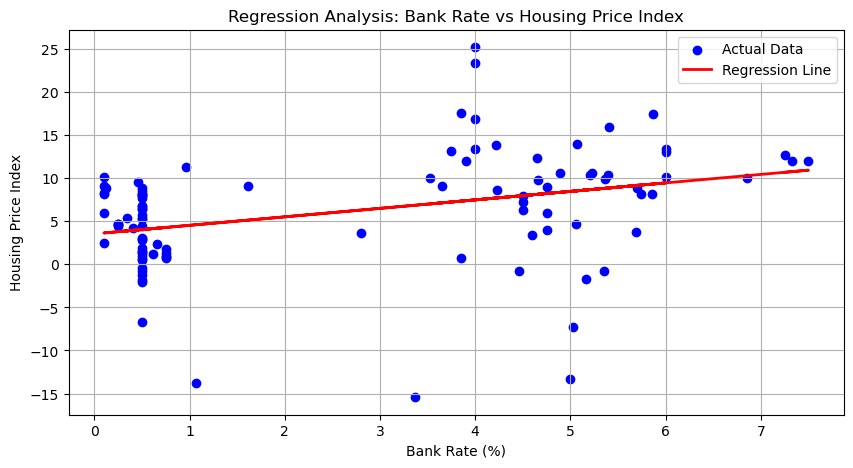

Coefficient: 0.9849762108101598
Intercept: 3.5463572119709017


In [14]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Preparing data for regression
X = combined_data[['Bank_Rate']]  # Independent variable
y = combined_data['Housing_Price_Index']  # Dependent variable

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predictions for plotting
predictions = model.predict(X)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, predictions, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Bank Rate (%)')
plt.ylabel('Housing Price Index')
plt.title('Regression Analysis: Bank Rate vs Housing Price Index')
plt.legend()
plt.grid(True)
plt.show()

# Output the coefficients
print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

In [15]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = combined_data[['Bank_Rate']]  # Independent variable
y = combined_data['Housing_Price_Index']  # Dependent variable
model = LinearRegression().fit(X, y)

In [16]:
# R-squared
r_squared = model.score(X, y)
print(f'R-squared: {r_squared}')

R-squared: 0.12309322124121391


In [17]:
from statsmodels.stats.stattools import durbin_watson

# First, get the residuals from the linear regression model
residuals = y - model.predict(X)

# Durbin-Watson statistic
dw_statistic = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_statistic}')

Durbin-Watson statistic: 0.20530197574706333


In [18]:
# Example: Add a recession indicator for the 2008 financial crisis
combined_data['Recession'] = 0  # Default to 0
recession_start, recession_end = '2008-01-01', '2009-12-31'
combined_data.loc[recession_start:recession_end, 'Recession'] = 1

# Re-fit the model with the recession indicator
X = combined_data[['Bank_Rate', 'Recession']]  # Now using two independent variables
model_with_recession = LinearRegression().fit(X, y)

# Get the new R-squared
new_r_squared = model_with_recession.score(X, y)
print(f'New R-squared with recession indicator: {new_r_squared}')

New R-squared with recession indicator: 0.12309322124121413


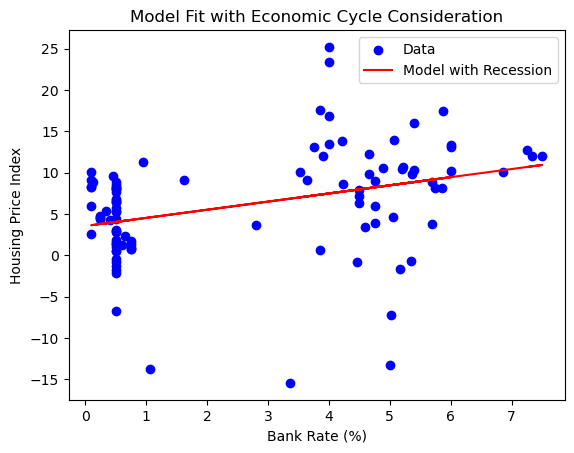

In [19]:
import matplotlib.pyplot as plt

plt.scatter(X['Bank_Rate'], y, color='blue', label='Data')
plt.plot(X['Bank_Rate'], model_with_recession.predict(X), color='red', label='Model with Recession')
plt.xlabel('Bank Rate (%)')
plt.ylabel('Housing Price Index')
plt.title('Model Fit with Economic Cycle Consideration')
plt.legend()
plt.show()

# Stationarity Test

In [29]:
def check_stationarity(data, signif=0.05, name='', print_out=True):
    r = adfuller(data, autolag='AIC')
    output = {'test_statistic': round(r[0], 4), 'p_value': round(r[1], 4), '1%': round(r[4]['1%'], 4), '5%': round(r[4]['5%'], 4), '10%': round(r[4]['10%'], 4)}
    if print_out:
        print(f'Augmented Dickey-Fuller Test on "{name}"', '\n', '-'*47)
        print('Null Hypothesis: Data has unit root. Non-Stationary.')
        print(f'Result: The series is {"non-stationary" if r[1] > signif else "stationary"}')
        print(f'Test Statistic = {output["test_statistic"]}')
        print(f'P-value = {output["p_value"]}')
        print(f'Critical Values = {output["1%"]}, {output["5%"]}, {output["10%"]}')
    return output

# Apply stationarity check on each series
check_stationarity(combined_data['Bank_Rate'])
check_stationarity(combined_data['Housing_Price_Index'])


Augmented Dickey-Fuller Test on "" 
 -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Result: The series is non-stationary
Test Statistic = -1.7874
P-value = 0.3867
Critical Values = -3.4982, -2.8912, -2.5826
Augmented Dickey-Fuller Test on "" 
 -----------------------------------------------
Null Hypothesis: Data has unit root. Non-Stationary.
Result: The series is non-stationary
Test Statistic = -1.6129
P-value = 0.4765
Critical Values = -3.5061, -2.8946, -2.5844


{'test_statistic': -1.6129,
 'p_value': 0.4765,
 '1%': -3.5061,
 '5%': -2.8946,
 '10%': -2.5844}

ADF Statistic: -1.7874227397140552
p-value: 0.38672358986949046
ADF Statistic: -1.6128763475236507
p-value: 0.47646587514286093


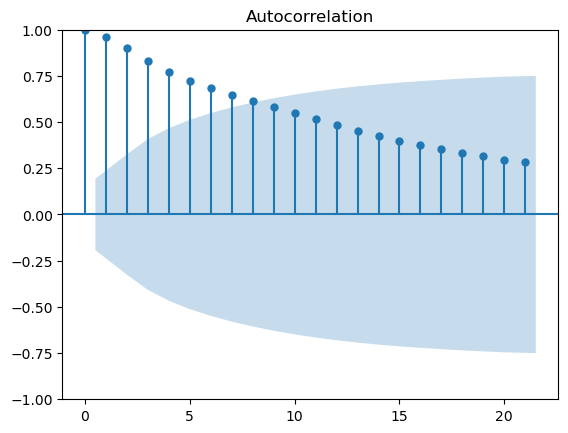

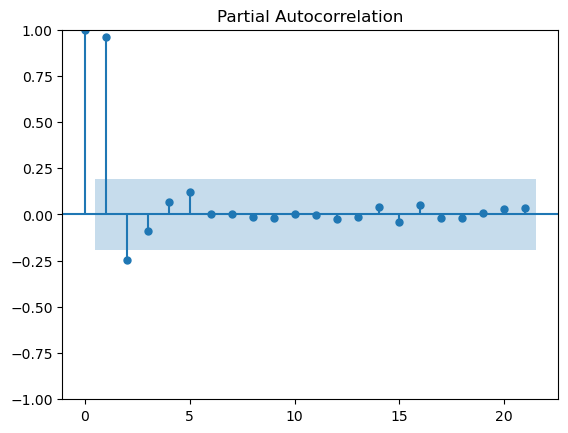

In [20]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Function to check stationarity
def check_stationarity(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

# Apply stationarity check on each series
check_stationarity(combined_data['Bank_Rate'])
check_stationarity(combined_data['Housing_Price_Index'])

# Plot ACF and PACF for one of the series or for the first principal component if combining features
plot_acf(combined_data['Bank_Rate'].dropna())
plot_pacf(combined_data['Bank_Rate'].dropna())
plt.show()


# ARIMA MODEL

C:\Users\virat\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\virat\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\virat\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Bank_Rate   No. Observations:                  102
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -23.288
Date:                Wed, 08 May 2024   AIC                             52.577
Time:                        20:07:52   BIC                             60.452
Sample:                             0   HQIC                            55.765
                                - 102                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0040      0.131     -0.030      0.976      -0.261       0.253
ar.L1          0.6812      0.034     19.827      0.000       0.614       0.749
sigma2         0.0919      0.006     14.199      0.0

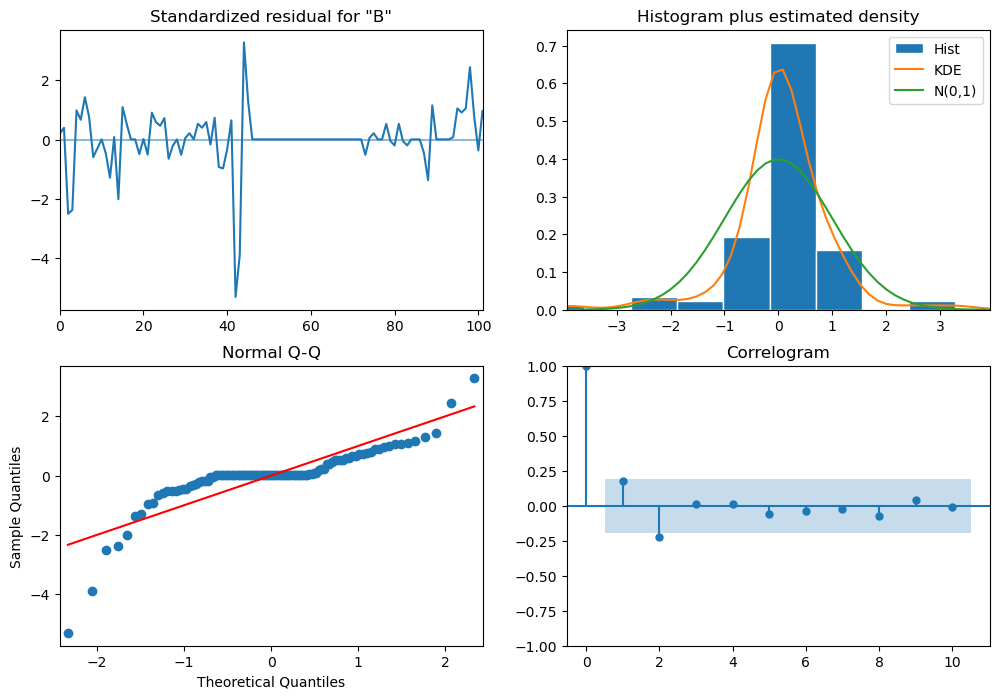

In [21]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'combined_data' contains the 'Bank_Rate' column
# First differencing to achieve stationarity
diff_series = combined_data['Bank_Rate'].diff().dropna()

# Fit ARIMA model
model = ARIMA(diff_series, order=(1,0,0))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Plot diagnostics
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()


                               SARIMAX Results                                
Dep. Variable:              Bank_Rate   No. Observations:                  103
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -17.161
Date:                Wed, 08 May 2024   AIC                             40.322
Time:                        20:08:22   BIC                             48.197
Sample:                             0   HQIC                            43.510
                                - 103                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4034      0.062      6.503      0.000       0.282       0.525
ma.L1          0.5600      0.066      8.499      0.000       0.431       0.689
sigma2         0.0812      0.004     18.939      0.0

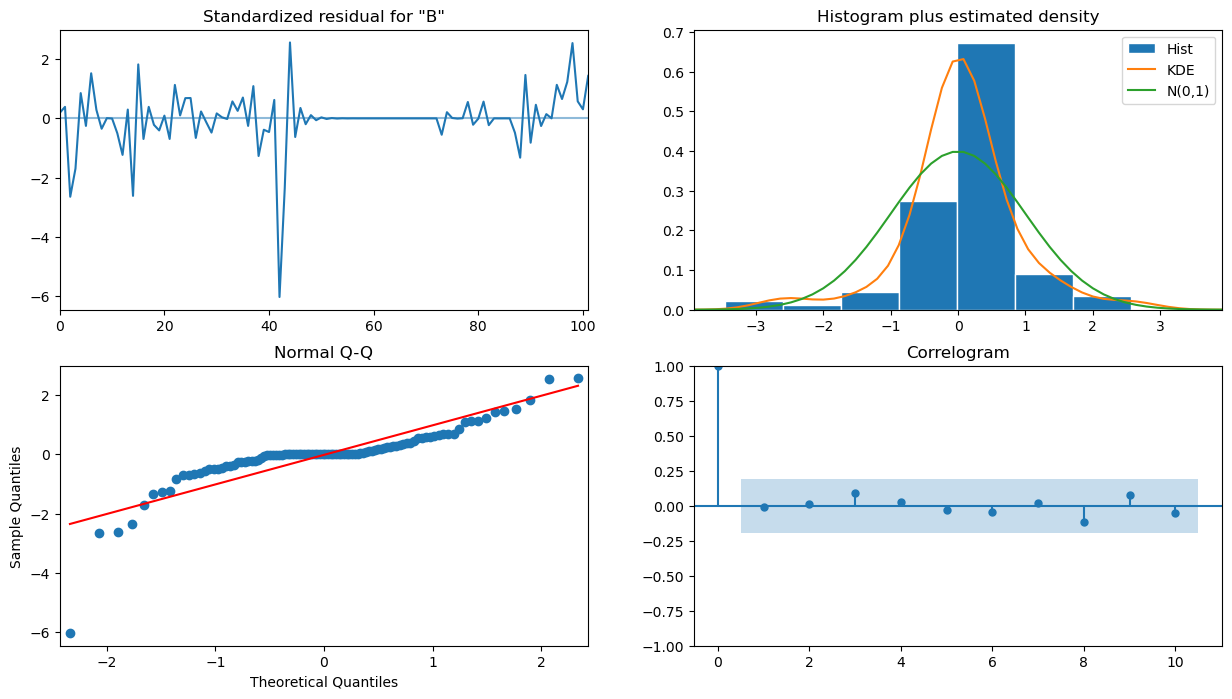

In [22]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model; replace (p,d,q) with your chosen parameters based on PACF and ACF
model = ARIMA(combined_data['Bank_Rate'], order=(1,1,1))  # Example: ARIMA(1,1,1)
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Diagnostics
model_fit.plot_diagnostics(figsize=(15, 8))
plt.show()


In [24]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming 'combined_data' contains the 'Bank_Rate' column
# Fit ARIMA model with additional MA component
model = ARIMA(combined_data['Bank_Rate'], order=(1,0,1))  # AR(1) and MA(1) without differencing
model_fit = model.fit()

# Print model summary to see if the MA component helps
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:              Bank_Rate   No. Observations:                  103
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -23.603
Date:                Wed, 08 May 2024   AIC                             55.206
Time:                        20:09:01   BIC                             65.745
Sample:                             0   HQIC                            59.475
                                - 103                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5364      2.317      1.957      0.050      -0.006       9.079
ar.L1          0.9817      0.030     32.371      0.000       0.922       1.041
ma.L1          0.7775      0.035     22.365      0.0

                               SARIMAX Results                                
Dep. Variable:              Bank_Rate   No. Observations:                  103
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -23.289
Date:                Wed, 08 May 2024   AIC                             50.579
Time:                        20:09:04   BIC                             55.828
Sample:                             0   HQIC                            52.704
                                - 103                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6814      0.029     23.288      0.000       0.624       0.739
sigma2         0.0919      0.005     17.232      0.000       0.081       0.102
Ljung-Box (L1) (Q):                   3.33   Jarque-

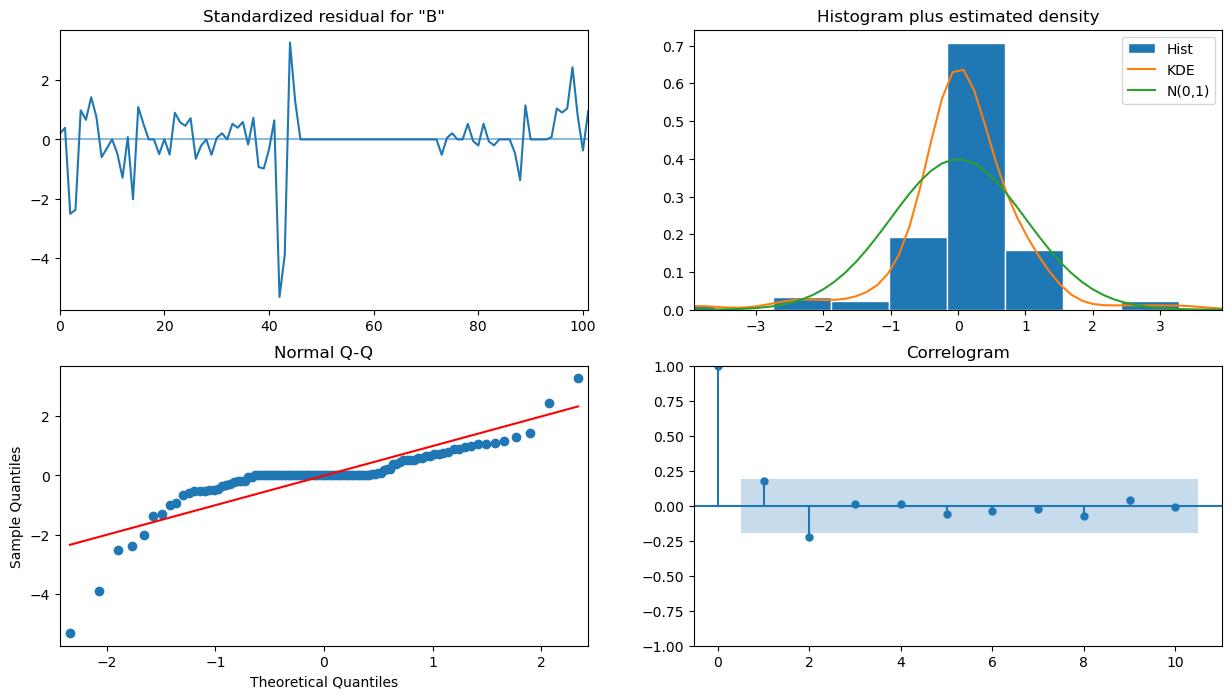

In [25]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Assuming 'combined_data' contains the 'Bank_Rate' column
# Fit ARIMA model with additional MA component
model = ARIMA(combined_data['Bank_Rate'], order=(1,1,0))  # AR(1) and MA(1) without differencing
model_fit = model.fit()

# Print model summary to see if the MA component helps
print(model_fit.summary())

# Diagnostics
model_fit.plot_diagnostics(figsize=(15, 8))
plt.show()


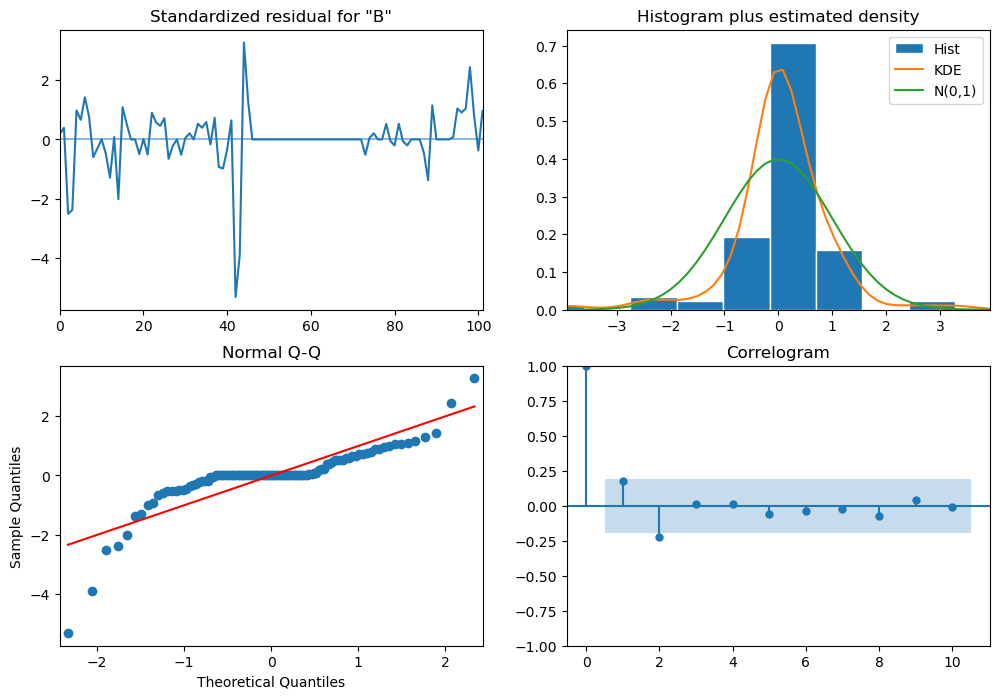

In [26]:
# Plot diagnostics
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()


# Forecasting Bank Rate

In [23]:
# Forecasting
forecast = model_fit.forecast(steps=5)
print(f'Forecast: {forecast}')

# Evaluate if you have a test set
# rmse = np.sqrt(mean_squared_error(test_data, forecast))
# print(f'Test RMSE: {rmse}')


Forecast: 103    5.672825
104    5.879595
105    5.962996
106    5.996637
107    6.010206
Name: predicted_mean, dtype: float64


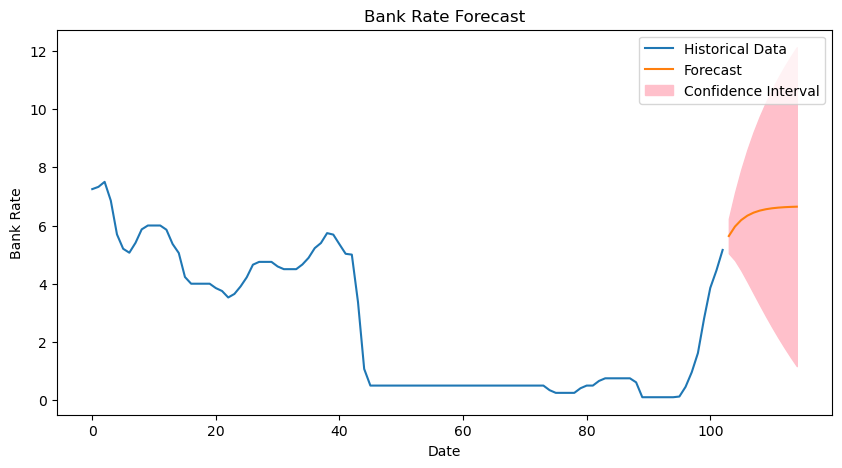

In [27]:
# Forecast the next 12 quarters
forecast = model_fit.get_forecast(steps=12)
forecast_conf = forecast.conf_int()

# Plot the forecast along with the confidence intervals
plt.figure(figsize=(10,5))
plt.plot(combined_data.index, combined_data['Bank_Rate'], label='Historical Data')
plt.plot(forecast_conf.index, forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_conf.index, forecast_conf.iloc[:, 0], forecast_conf.iloc[:, 1], color='pink', label='Confidence Interval')
plt.title('Bank Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Bank Rate')
plt.legend()
plt.show()


In [28]:
from statsmodels.tsa.stattools import adfuller, coint

# DATA STATISTICS

In [67]:
pip install pandas matplotlib seaborn


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Improve the aesthetics of the plots
sns.set(style="whitegrid")


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
data1 = pd.read_csv('IUQABEDR Bank of England Database.csv')
data2 = pd.read_csv('QGBN368BIS (1).csv')

# Convert date columns to datetime
data1['Date'] = pd.to_datetime(data1['Date'])
data2['DATE'] = pd.to_datetime(data2['DATE'])

# Set the date columns as indices
data1.set_index('Date', inplace=True)
data2.set_index('DATE', inplace=True)

# Resample both datasets to a common frequency if necessary, e.g., Quarterly
data1 = data1.resample('Q').mean()
data2 = data2.resample('Q').mean()

# Merging datasets on the index
combined_data = pd.merge(data1, data2, left_index=True, right_index=True, how='inner')

# Print the merged DataFrame to check the results
print(combined_data.head())


C:\Users\virat\AppData\Local\Temp\ipykernel_32792\946178575.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data1['Date'] = pd.to_datetime(data1['Date'])


            Quarterly average of official Bank Rate              [a] [b]             IUQABEDR  \
Date                                                                                            
1998-03-31                                             7.2500                                   
1998-06-30                                             7.3279                                   
1998-09-30                                             7.5000                                   
1998-12-31                                             6.8555                                   
1999-03-31                                             5.6944                                   

            QGBN368BIS  
Date                    
1998-03-31      9.1667  
1998-06-30     12.7451  
1998-09-30     11.9751  
1998-12-31     12.0501  
1999-03-31     10.0763  


       Quarterly average of official Bank Rate              [a] [b]             IUQABEDR  \
count                                         104.000000                                   
mean                                            2.591766                                   
std                                             2.349053                                   
min                                             0.100000                                   
25%                                             0.500000                                   
50%                                             0.854150                                   
75%                                             4.750000                                   
max                                             7.500000                                   

       QGBN368BIS  
count  104.000000  
mean     6.103505  
std      6.560289  
min    -15.424400  
25%      1.833425  
50%      6.593500  
75%      9.941425  
max     25.

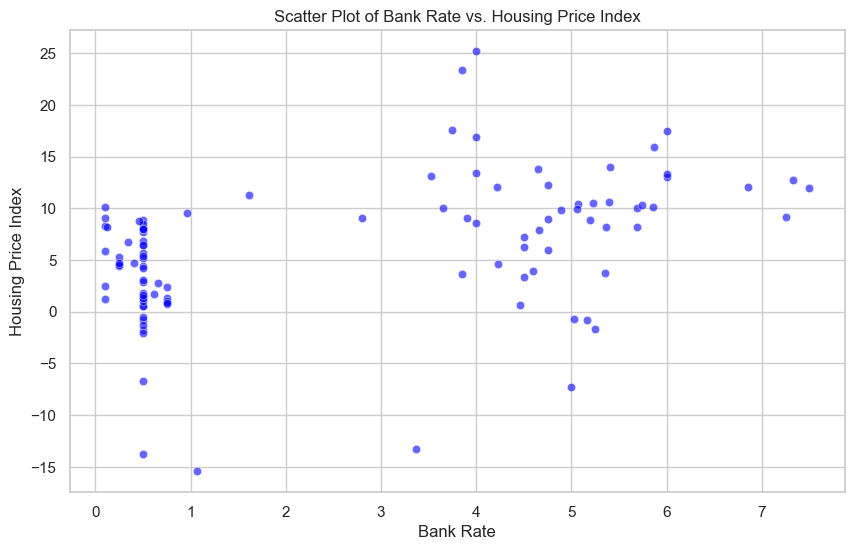

In [75]:
# Descriptive statistics
print(combined_data.describe())

# Setting plot style
sns.set(style="whitegrid")

# Creating a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=combined_data.columns[0], y=combined_data.columns[1], data=combined_data, color='blue', alpha=0.6)
plt.title('Scatter Plot of Bank Rate vs. Housing Price Index')
plt.xlabel('Bank Rate')
plt.ylabel('Housing Price Index')
plt.show()


In [104]:
import pandas as pd

# Load the data from both files to check their column names
data_bank_rate = pd.read_csv('IUQABEDR Bank of England Database.csv')
data_housing_prices = pd.read_csv('QGBN368BIS (1).csv')

# Print the column names to identify the correct name for the date columns and the data columns
print("Bank Rate Data Columns:", data_bank_rate.columns)
print("Housing Prices Data Columns:", data_housing_prices.columns)


Bank Rate Data Columns: Index(['Date', 'Quarterly average of official Bank Rate              [a] [b]             IUQABEDR'], dtype='object')
Housing Prices Data Columns: Index(['DATE', 'QGBN368BIS'], dtype='object')
